# <font  color=blue>Análise de Sentimento no Twitter</font>

Esse projeto consiste na Análise de sentimentos de tweets coletados através da API do Twitter sobre X. O projeto consiste em:
* Coleta de tweets.
* Identificação de tweets mais curtidos e retweetados.
* Identificação da fonte dos tweets. 
* Análise de sentimentos. 
* Nuvem de palavras mais frequentes. 
* Séries de tweets no tempo. 
* Mapa de calor dos tweets utilizando a localização declarada pelos usuários.


##### <font color=red>Instalação dos pacotes</font>

Antes de realizar o desafio será necessário instalar os seguintes pacotes:
* **Geopy:** Usada para definir a geolocalização<br>
*conda install -c conda-forge geopy*
* **folium**
*conda install -c conda-forge folium*
* **wordcloud:** Usada para gerar uma nuvem de palavras<br>
*conda install -c conda-forge wordcloud*
* **pandas**<br>
*conda install -c anaconda pandas*

### <font color=blue>Importação de pacotes</font>

In [1]:
# Pacotes básico
import tweepy #Acessa API do Twitter
import pandas as pd     
import numpy as np 
from textblob import TextBlob as tb
import time
import re

# Pacotes para visualização 
import matplotlib.pyplot as plt

#MAPA
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS

### <font color=blue>Definição das credenciais de acesso (autenticação) na API do Twitter</font>

In [2]:
# Credenciais para utilização da API do Twitter
consumer_key = "w14sE6WOPocTI0ZCmrXMoXLK2"
consumer_secret = "IChDWYpSXRr5HFGxFKtoSUaEysiiY3LIIKVDrR4twEpk1QSZ9Y"
access_token = "1574569164-EQGkgTBJhCIRwWPUWjCGZK7pkwV8P6ZKwDz1fSA"
access_token_secret = "nrppar8dsdmQT1fFcGvYgbeBHu9JvcjIZzjPEpYOuzky8"


### <font color=blue>Autenticação na API do Twitter</font>

In [3]:
#Realizar autenticação no Twitter

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,retry_count=5)

**onde:**
* retry_count - número padrão de tentativas para tentar quando ocorrer um erro
* retry_delay - número de segundos para aguardar entre tentativas
* wait_on_rate_limit - se deve ou não esperar automaticamente a reposição dos limites de taxa
* wait_on_rate_limit_notify - Imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

### <font color=blue>Coleta de dados (busca por palavra chave)</font>

In [12]:
# Definir listas de armazenamento
tweets = []
info = []

#Definir que palavra deseja pesquisar no Twitter
#keyword = ('home office  OR  trabalho remoto  OR  trabalho em casa OR homeoffice OR  trabalhoremoto OR trabalhoemcasa')
keyword = ("covid-19  OR  covid  OR  coronavirus OR pandemic")


**OBSERVAÇÃO:**
A documentação completa do pacote *tweepy* está disponível no link abaixo:
* http://docs.tweepy.org/en/v3.5.0/api.html

Para realizar a busca por palavra chave vamos utilizar a função abaixo:<br>
* <font color=green>API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])</font><br><br>
**onde os principais parâmetros que serão usados são:**

* <font color=blue>q</font> - a string de consulta de pesquisa
* <font color=blue>lang</font> - Restringe os tweets para o idioma especificado, fornecido por um código ISO 639-1.
* <font color=blue>rpp</font> - O número de tweets a serem retornados por página, até no máximo 100.
* <font color=blue>page</font> - O número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp).
* <font color=blue>since_id</font>  - Retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado.
* <font color=blue>geocode</font>  - Retorna tweets de usuários localizados em um determinado raio da latitude / longitude especificada.
* <font color=blue>show_user</font>  - Quando verdadeiro, precede "<user>:" no início do tweet. O padrão é falso.



#####  <font color=red>Exemplo básico para busca por palavra chave e recuperar os tweets em português.</font>

**Observação:** Antes de executar o código abaixo, faça a instalação dos pacotes conforme os comandos abaixo:
* googletrans (https://anaconda.org/conda-forge/googletrans)<br>
*conda install -c conda-forge googletrans*
* unidecode (https://anaconda.org/anaconda/unidecode)<br>
*conda install -c anaconda unidecode*

In [7]:
from googletrans import Translator
from unidecode import unidecode

polaritiesPT = []

for tweetpt in tweepy.Cursor(api.search,q=keyword, tweet_mode='extended',
                           rpp=5, result_type="popular",lang="pt",
                           include_entities=True).items(5):
    #Texto do Tweet
    textPT = unidecode(tweetpt.full_text)
    print('** Tweet em português: '+textPT)
    #Traduzindo para o Inglês
    textEN = Translator().translate(textPT)
    print('** Tweet traduzido:')
    print(textEN.text)
    #Calculando a polaridade do texto traduzido
    polarityPT = tb(textEN.text).sentiment.polarity #analisa a polaridade

    polaritiesPT.append(polarityPT)
    print('\n')

In [8]:
print(polaritiesPT)

[]


##  <font color=blue>Buscar por palavra chave e recuperar os tweets em inglês</font>

In [13]:
for tweet in tweepy.Cursor(api.search,
                           q=keyword, tweet_mode='extended',
                           rpp=2500, result_type="popular",lang='en', #serão coletados apenas 1000 tweets nesta aula
                           include_entities=True).items(2500):
                           #include_entities=True).items(1000):   
        
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    #file = open("tweets_Keyword_covid_10.txt", "a", -1, "utf-8")
    file = open("tweets_Keyword_covid10000.txt", "a", -1, "utf-8")    
    file.write(newtweet+'\n')
    file.close()
    
    #time.sleep(0.5)

In [14]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(info)))

Total de tweets coletados 91.


### <font color=blue>Criar dataframe</font>

In [15]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])         
tweets_df['Place']    = np.array([tweet.place for tweet in info])

tweets_df.to_csv("tweets_Keyword_covid_100.csv")

In [16]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Coronavirus deaths are way down. Mortality rat...,190,1276363261957603328,realDonaldTrump,Donald J. Trump,"Washington, DC",None,2020-06-26 03:54:49,Twitter for iPhone,199940,43196,None,None,None
1,COVID-19 victim's body carried in an earthmove...,99,1276545757047222272,thenewsminute,The News Minute,Bengaluru,None,2020-06-26 16:00:00,TweetDeck,5,10,None,None,None
2,Never in the history of American politics has ...,255,1276621006774448134,RealCandaceO,Candace Owens,"New York, USA",None,2020-06-26 20:59:01,Twitter for iPhone,55960,15899,None,None,None


### Identificar Top Tweets coletados

In [17]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))


O tweet com mais curtidas (likes) é: 
Actually you just got ROCKED by teens on TikTok who flooded the Trump campaign w/ fake ticket reservations &amp; tricked you into believing a million people wanted your white supremacist open mic enough to pack an arena during COVID  Shout out to Zoomers. Y’all make me so proud. ☺️ https://t.co/jGrp5bSZ9T
Número de curtidas: 615151


In [18]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta quantos tweets possuem o mesmo valor máximo de curtidas

1


In [19]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
Actually you just got ROCKED by teens on TikTok who flooded the Trump campaign w/ fake ticket reservations &amp; tricked you into believing a million people wanted your white supremacist open mic enough to pack an arena during COVID  Shout out to Zoomers. Y’all make me so proud. ☺️ https://t.co/jGrp5bSZ9T
Número de retweets: 115937


In [20]:
print(np.sum(tweets_df['Retweets'] == retweet_max)) #conta quantos tweets possuem o mesmo valor máximo de Retweets

1


### Identifica a fonte(origem) do tweet

A fonte neste caso é o app ou dispositivo onde o usuário postou o tweet

In [21]:
sources = [] #lista para armazenar a fontes
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) #inclui no vetor sources apenas se a fonte encontrada ainda não foi incluída

percent = np.zeros(len(sources)) #Retorna um novo vetor, com o número de elementos do vetor sources, preenchido com zeros a new array filled with zeros, for

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

##### Gráfico que exibe o número de tweets por fonte

In [22]:
sourceDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sourceDF

,source
Twitter for iPhone,25.0
TweetDeck,7.0
Sprinklr,2.0
SocialFlow,8.0
Twitter Web App,32.0
Twitter for iPad,4.0
Twitter for Android,6.0
Twitter Media Studio,3.0
Sprout Social,1.0
TweetCaster for iOS,1.0


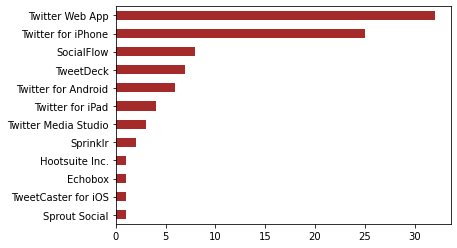

In [23]:
sources_sorted = sourceDF.sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

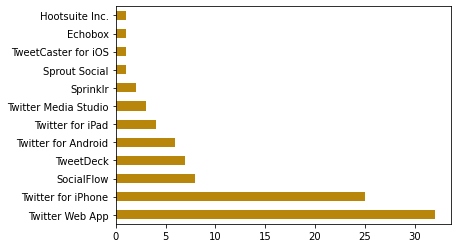

In [24]:
sources_sorted = sourceDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

**Dica:** 
Veja relação de cores em HTML em:
* https://www.w3schools.com/tags/ref_colornames.asp

## <font color=red>Análise de polaridade:</font>

In [25]:
#Variável que irá armazenar as polaridades
analysis = None

In [26]:
# Lista vazia para armazenar as polaridades
polarities = []

In [27]:
tweets_df.head(1)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Coronavirus deaths are way down. Mortality rat...,190,1276363261957603328,realDonaldTrump,Donald J. Trump,"Washington, DC",None,2020-06-26 03:54:49,Twitter for iPhone,199940,43196,None,None,None


##### Calcula polaridade (sentiment.polarity)

In [28]:
for tweet in tweets_df['Tweets']: #para cada tweet    
    analysis = tb(tweet)   
    
    polarity = analysis.sentiment.polarity #analisa a polaridade

    polarities.append(polarity)

**ou**

In [ ]:
for tweet in tweets_df['Tweets']: #para cada tweet    
    #analysis = tb(tweet)   
   
    polarity = tb(tweet).sentiment.polarity #analisa a polaridade

    polarities.append(polarity)

In [29]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Coronavirus deaths are way down. Mortality rat...,190,1276363261957603328,realDonaldTrump,Donald J. Trump,"Washington, DC",None,2020-06-26 03:54:49,Twitter for iPhone,199940,43196,None,None,None
1,COVID-19 victim's body carried in an earthmove...,99,1276545757047222272,thenewsminute,The News Minute,Bengaluru,None,2020-06-26 16:00:00,TweetDeck,5,10,None,None,None
2,Never in the history of American politics has ...,255,1276621006774448134,RealCandaceO,Candace Owens,"New York, USA",None,2020-06-26 20:59:01,Twitter for iPhone,55960,15899,None,None,None


In [30]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [-0.07777777777777779, -0.07500000000000001, 0.009523809523809526, 0.0, 0.0, 0.05333333333333334, -0.3333333333333333, 0.3, -0.19999999999999998, 0.0, -0.2, 0.0, 0.0, -0.125, 0.30000000000000004, 0.0, 0.3333333333333333, 0.0, 0.0, -0.35, 0.0, -0.18181818181818182, 0.11468253968253969, 0.24675324675324675, 0.26633522727272724, -0.2, 0.0, -1.0, 0.05, 0.20000000000000004, -0.12676767676767678, -0.1638888888888889, 0.1481818181818182, 0.0, -0.4222222222222222, 0.15, 0.11363636363636363, -0.075, -0.09999999999999998, 0.16666666666666666, 0.13636363636363635, 0.07575757575757576, 0.0, -0.03333333333333333, -0.05, 0.0, -0.125, -0.08333333333333333, -0.031111111111111128, -0.003409090909090917, 0.05000000000000001, 0.05714285714285716, 0.08333333333333334, -0.3453703703703704, 0.23142857142857146, 0.0, -0.16875, -0.05, -0.33809523809523806, 0.0, 0.20134680134680136, 0.1, 0.1875, -0.07222222222222222, 0.14285714285714285, 0.1625, -0.225, 0.0, 0.5, 0.5125, 0.0568181818181818

## <font color=red>Análise de Sentimentos:</font>

In [31]:
print('Para a(s) palavra(s):"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a(s) palavra(s):"covid-19  OR  covid  OR  coronavirus OR pandemic"
A MÉDIA DE SENTIMENTO É: -0.0038318047693047747


In [32]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1                           

In [33]:
print("Tweets Positivos: %s" % positive)
print("Tweets Negativos: %s" % negative)
print("Tweets Neutros: %s" % neutral)

Tweets Positivos: 35
Tweets Negativos: 33
Tweets Neutros: 23


In [34]:
#calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [35]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

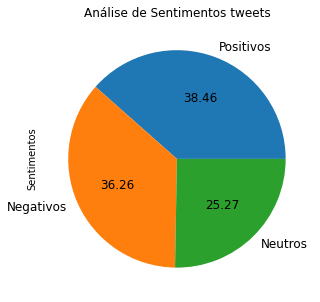

In [36]:
pie_chart = pd.Series(percents, index=sentiments,name='Sentimentos')
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5),title="Análise de Sentimentos tweets");

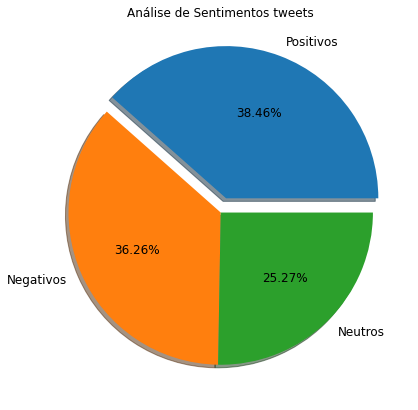

In [37]:
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',        shadow=True, startangle=90)
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True, figsize=(7, 7),title="Análise de Sentimentos tweets");

**Dica:**
Veja a documentação do pacote *Matplotlib* no link:
* https://matplotlib.org/3.1.1/contents.html#

### <font color=blue>Mapa de calor dos tweets</font>

In [38]:
geolocator = Nominatim(user_agent="TweeterSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

**Dica:** Veja a documentação da função *Nominatim* no link:

* https://geopy.readthedocs.io/en/stable/#nominatim

In [39]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('covid.html')
mapa

**Dica:** Para conhecer o pacote Folium veja os links:
* https://python-visualization.github.io/folium/
* https://medium.com/@datalivre/folium-d6036a9ad29c

### <font color=blue>Nuvem de palavras</font>

In [40]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

**OBSERVAÇÃO:**
Antes de importar o pacote imread faça a intalação do mesmo.

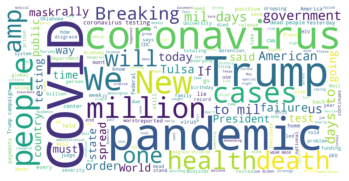

In [41]:
import warnings

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('covid_clound.png', dpi=300)
plt.show()

**Dica:** Para conhecer o pacote WordCloud veja os links:
* https://amueller.github.io/word_cloud/index.html
* Exemplos: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

In [ ]:
wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='black', #cor de fundo
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.savefig('covid_clound.png', dpi=300)
plt.show()

#####  Para texto em português, use o exemplo abaixo:

In [ ]:
stopwords= set(STOPWORDS)

new_words = []
with open("stopwords_pt.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('covid_clound_pt.png', dpi=300)
plt.show()

### <font color=blue>Análise temporal dos tweets</font> 

In [ ]:
#Tweets postados por dia
data = tweets_df

In [ ]:
print(data['Date'][0])

In [ ]:
from datetime import datetime

In [ ]:
#Tweets postados por dia
data = tweets_df

print(data['Date'][0])

data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

print(data['Date'][0])

In [ ]:
x = data['Date'].value_counts() #conta a quantidade de tweets por dia
x

In [ ]:
tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])

tlen.plot(figsize=(16,4), color='r');

## <font color=red>Text Mining com o pacote NLTK</font>

Para conhecer o pacote *NLTK* veja a documentação completa em:
* https://www.nltk.org/index.html

**Desgustação**

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [ ]:
tweets_tokens = [] #lista para armazenar os tokens

In [ ]:
for tweet in tweets_df['Tweets']:   
    print (tweet_tokenizer.tokenize(tweet))
    tweets_tokens.append(tweet_tokenizer.tokenize(tweet))

#### Limpar tokens

In [ ]:
from nltk.corpus import stopwords 
import string
 
#punctuation = list(string.punctuation)
stopwords_english = stopwords.words('english')

In [ ]:
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
                word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
 
    return tweets_clean    

In [ ]:
clean_tweets_tokens = [] #lista para armazenar os tokens

In [ ]:
for tweet in tweets_df['Tweets']:   
    print (clean_tweets(tweet))
    clean_tweets_tokens.append(clean_tweets(tweet))

Fim!